In [50]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# base_url = "https://www.scrapethissite.com"
# page = 1
# all_data = []

# while True:
#     url = f"{base_url}/pages/forms/?page_num={page}&per_page=25"
#     res = requests.get(url)
#     soup_object = BeautifulSoup(res.text, "html.parser")

    
#     teams = soup_object.find_all("tr", class_="team")
#     if not teams:
#         break  

   
#     for t in teams:
#         name = t.find("td", class_="name").text.strip()
#         wins = t.find("td", class_="wins").text.strip()
#         losses = t.find("td", class_="losses").text.strip()
#         ot_wins = t.find("td", class_="ot-losses").text.strip()
#         pct = t.find("td", class_="pct").text.strip()
#         gf = t.find("td", class_="gf").text.strip()
#         ga = t.find("td", class_="ga").text.strip()
#         diff = t.find("td", class_="diff").text.strip()

#         all_data.append({
#             "Name": name,
#             "Wins": wins,
#             "Losses": losses,
#             "OT Losses": ot_wins,
#             "Pct": pct,
#             "GF": gf,
#             "GA": ga,
#             "Diff": diff
#         })

#     print(f"✅ Page {page} done.")
#     page += 1

# df = pd.DataFrame(all_data)
# df


In [51]:
from urllib.parse import urljoin

import requests
import pandas as pd

headers = {
    "Content-Type": "application/json",
    "User-Agent": "Mozilla/5.0",
    "x-platform": "mobile"
}

offset = 0
data_list = []

while True:
    url = "https://bina.az/graphql"
    payload = {
        "operationName": "FeaturedItemsRow",
        "variables": {"limit": 24, "offset": offset},
        "extensions": {
            "persistedQuery": {
                "version": 1,
                "sha256Hash": "f34b27afebc725b2bb62b62f9757e1740beaf2dc162f4194e29ba5a608b3cb41"
            }
        }
    }

    r = requests.post(url, headers=headers, json=payload)
    json_data = r.json()

    items = json_data.get("data", {}).get("items", [])
    if not items:
        print("The last page reached.")
        break

    for item in items:
        location = item.get("location")
        location_name = location.get("fullName") if location else None
        data_list.append({
            "id": item.get("id"),
            "title": item.get("title", ""),
            "price": item.get("price", {}).get("value"),
            "currency": item.get("price", {}).get("currency"),
            "area": item.get("area", {}).get("value"),
            # "location": item.get("location", {}).get("fullName", None),
            "company": item.get("company", {}).get("name"),
            "rooms": item.get("rooms"),
            "floor": item.get("floor"),
            "total_floors": item.get("floors")
        })
        data_list.append({"location":location_name})
    base_url = "https://bina.az"
    path = "/items/5455856"

    full_url = urljoin(base_url, path)
    print(full_url)

    print(f"Offset {offset} done, {len(items)} items loaded.")
    offset += 24

df = pd.DataFrame(data_list)
# print(df.head()) 
print(df)
# df.to_csv("bina_az_data.csv", index=False)



https://bina.az/items/5455856
Offset 0 done, 24 items loaded.
https://bina.az/items/5455856
Offset 24 done, 24 items loaded.
https://bina.az/items/5455856
Offset 48 done, 24 items loaded.
https://bina.az/items/5455856
Offset 72 done, 24 items loaded.
https://bina.az/items/5455856
Offset 96 done, 24 items loaded.
https://bina.az/items/5455856
Offset 120 done, 24 items loaded.
https://bina.az/items/5455856
Offset 144 done, 24 items loaded.
https://bina.az/items/5455856
Offset 168 done, 24 items loaded.
https://bina.az/items/5455856
Offset 192 done, 24 items loaded.
https://bina.az/items/5455856
Offset 216 done, 24 items loaded.
https://bina.az/items/5455856
Offset 240 done, 24 items loaded.
https://bina.az/items/5455856
Offset 264 done, 24 items loaded.
https://bina.az/items/5455856
Offset 288 done, 24 items loaded.
https://bina.az/items/5455856
Offset 312 done, 24 items loaded.
https://bina.az/items/5455856
Offset 336 done, 24 items loaded.
https://bina.az/items/5455856
Offset 360 done,

In [52]:
print(df.describe()) 

              price          area        rooms       floor  total_floors
count  1.311000e+03   1311.000000  1131.000000  936.000000    936.000000
mean   4.565805e+05    232.221281     3.118479    6.974359     12.004274
std    6.835858e+05   1073.728364     1.917808    4.684185      5.659310
min    3.900000e+01      2.000000     1.000000    1.000000      2.000000
25%    1.470000e+05     73.000000     2.000000    3.000000      7.000000
50%    2.999820e+05    110.000000     3.000000    6.000000     10.000000
75%    5.296895e+05    172.750000     4.000000   10.000000     16.000000
max    1.000000e+07  31000.000000    20.000000   32.000000     33.000000


In [53]:
df

,id,title,price,currency,area,company,rooms,floor,total_floors,location
0,5155249,,399500.0,AZN,450.0,Aslan,7.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Badamdar q.
2,5606835,,320.0,AZN,25.0,Ülvi,1.0,1.0,2.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8 Noyabr m.
4,5597772,,45500.0,AZN,29.0,Eltun,2.0,16.0,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nardaran q.
2618,4451841,,319200.0,AZN,79.9,Sea Breeze,2.0,8.0,8.0,NaN
2619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nardaran q.
2620,4451973,,549355.0,AZN,140.5,Sea Breeze,3.0,5.0,8.0,NaN


In [54]:
df.groupby('company').size().reset_index(name='count')



,company,count
0,Muxtarov Real Estate,1
1,"""Avant Group""",6
2,"""Megapolis Estate"" İlqar Məmmədov",1
3,-,1
4,4YOU Baku,6
...,...,...
495,Тарьел,3
496,Фуад,1
497,эльхан,1
498,𝑍&𝑆 Ə𝑚𝑙𝑎𝑘,1


In [55]:
count=df.groupby('location').size()
common_location=count.idxmax()
common_count=count.max()

print(common_location,common_count)

Sea Breeze q. 224


In [56]:
max_price = df['price'].max()
df.loc[df['price'] == max_price, ['price', 'location']]


,price,location
1240,10000000.0,NaN


In [57]:
df.columns

Index(['id', 'title', 'price', 'currency', 'area', 'company', 'rooms', 'floor',
       'total_floors', 'location'],
      dtype='object')

C:\Users\Orbit Computers\AppData\Local\Temp\ipykernel_20832\1102543169.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='location', data=top_locations, palette='viridis')


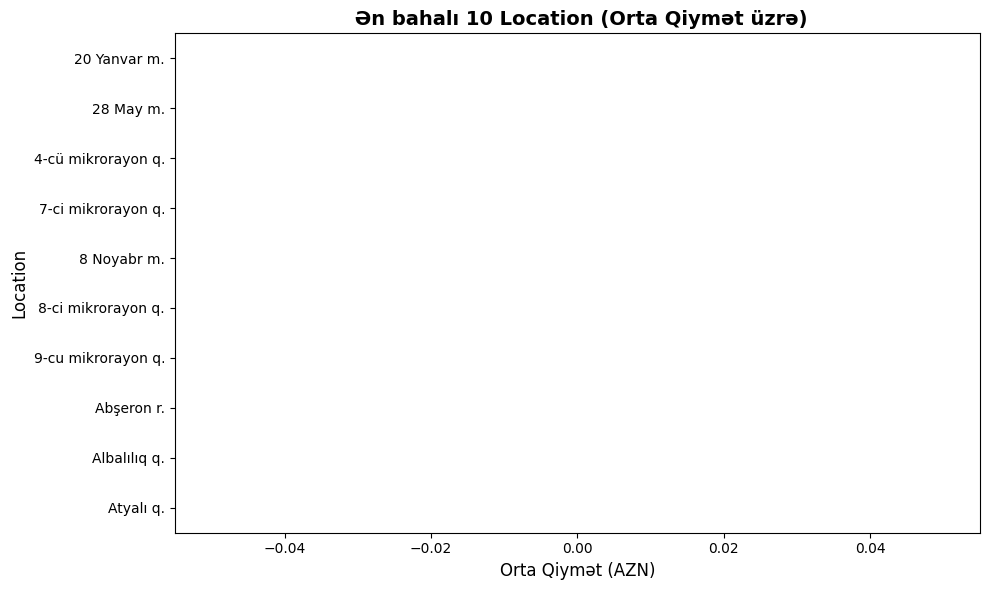

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

top_locations = (
    df.groupby('location')['price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(x='price', y='location', data=top_locations, palette='viridis')

plt.title(' Ən bahalı 10 Location (Orta Qiymət üzrə)', fontsize=14, weight='bold')
plt.xlabel('Orta Qiymət (AZN)', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.tight_layout()
plt.show()



In [66]:
df['location'].values()

KeyError: 'location'

In [60]:
df.corr(numeric_only=True)

,price,area,rooms,floor,total_floors
price,1.000000,0.286877,0.391889,0.072450,0.034231
area,0.286877,1.000000,0.807465,0.084970,0.148618
rooms,0.391889,0.807465,1.000000,0.110756,0.174079
floor,0.072450,0.084970,0.110756,1.000000,0.653514
total_floors,0.034231,0.148618,0.174079,0.653514,1.000000


R² score: 0.5752601223896807
Mean Absolute Error: 152426.28415043058


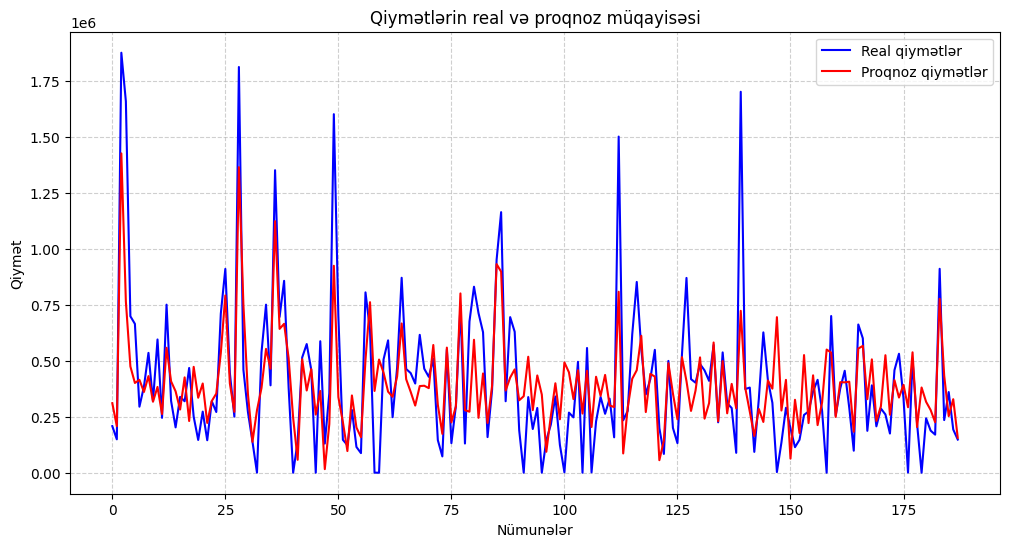

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


df = df[['price', 'area', 'rooms', 'floor']]
df = df.dropna()


X = df[['area', 'rooms', 'floor']]
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Real qiymətlər', color='blue')
plt.plot(y_pred, label='Proqnoz qiymətlər', color='red')
plt.legend(loc='best', fontsize=10)
plt.title("Qiymətlərin real və proqnoz müqayisəsi")
plt.xlabel("Nümunələr")
plt.ylabel("Qiymət")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
